<a href="https://colab.research.google.com/github/shamim237/Bangla-Sign-digit-recognition/blob/main/Bengali_Sign_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import tqdm
import os
import cv2
from PIL import Image
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.models import Model, load_model, Sequential

from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD


In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
img_dir = '/content/drive/MyDrive/digit_dataset/'

In [6]:
size = 128
dataset = []
label = []

In [3]:
X_train = np.load('/content/drive/MyDrive/digit_dataset/X_train.npy')
X_test = np.load('/content/drive/MyDrive/digit_dataset/X_test.npy')
y_train = np.load('/content/drive/MyDrive/digit_dataset/y_train.npy')
y_test = np.load('/content/drive/MyDrive/digit_dataset/y_test.npy')

In [7]:
model_d= tf.keras.applications.InceptionV3(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(size, size, 3)))

87916544/87910968 [==============================] - 1s 0us/step


In [8]:
x= model_d.layers[-3].output
#x= Conv2D(32, kernel_size=3)(x)
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.3)(x)
#x= MaxPooling2D(2)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
#x= BatchNormalization()(x)
x= Dense(64,activation='relu')(x)

predictions= Dense(10, activation = 'softmax')(x)
model= Model(inputs= model_d.input, outputs= predictions)

In [10]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [11]:
model.compile(optimizer= Adam(lr= 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history= model.fit(X_train, y_train, 
                   #steps_per_epoch= 250, 
                   validation_data= (X_test, y_test), 
                   verbose = 1, 
                   epochs = 20, 
                   batch_size = 64)

Epoch 1/20
103/103 [==============================] - 45s 98ms/step - loss: 1.6849 - accuracy: 0.4197 - val_loss: 0.7072 - val_accuracy: 0.8087
Epoch 2/20
103/103 [==============================] - 7s 72ms/step - loss: 0.3414 - accuracy: 0.8963 - val_loss: 0.2244 - val_accuracy: 0.9369
Epoch 3/20
103/103 [==============================] - 7s 72ms/step - loss: 0.1057 - accuracy: 0.9715 - val_loss: 0.1228 - val_accuracy: 0.9593
Epoch 4/20
103/103 [==============================] - 7s 72ms/step - loss: 0.0372 - accuracy: 0.9906 - val_loss: 0.0900 - val_accuracy: 0.9715
Epoch 5/20
103/103 [==============================] - 7s 72ms/step - loss: 0.0176 - accuracy: 0.9964 - val_loss: 0.0988 - val_accuracy: 0.9739
Epoch 6/20
103/103 [==============================] - 7s 72ms/step - loss: 0.0183 - accuracy: 0.9966 - val_loss: 0.1160 - val_accuracy: 0.9709
Epoch 7/20
103/103 [==============================] - 7s 72ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.1382 - val_accuracy: 0.956

In [105]:
model.save('/content/drive/MyDrive/Colab Notebooks/digit_model.h5')

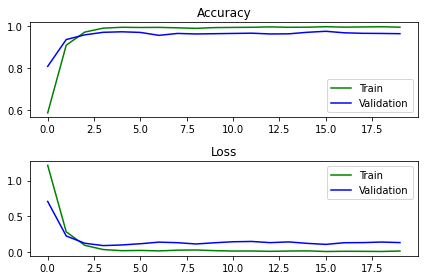


train_accuracy :  [0.5865735411643982, 0.9099331498146057, 0.9725090861320496, 0.9913426637649536, 0.9954435229301453, 0.9945322275161743, 0.9949878454208374, 0.9928615093231201, 0.9904313683509827, 0.9939246773719788, 0.9948359727859497, 0.9954435229301453, 0.9972661137580872, 0.9954435229301453, 0.9958991408348083, 0.9981774091720581, 0.996051013469696, 0.9971142411231995, 0.9980255365371704, 0.9958991408348083]
valid_accuracy :  [0.8087431788444519, 0.936854898929596, 0.9593199491500854, 0.9714632630348206, 0.9738919138908386, 0.9708561301231384, 0.9568912982940674, 0.9659987688064575, 0.9635701179504395, 0.9647844433784485, 0.9659987688064575, 0.9672130942344666, 0.9635701179504395, 0.9641773104667664, 0.9714632630348206, 0.9763205647468567, 0.9690346121788025, 0.9666059613227844, 0.9659987688064575, 0.9647844433784485]
train_err :  [1.2124295234680176, 0.28257355093955994, 0.09337009489536285, 0.034550875425338745, 0.018984710797667503, 0.022661447525024414, 0.015845557674765587,

In [13]:
#matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
# plot loss and accuracy
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color="g", label="Train")
plt.plot(history.history["val_accuracy"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

print()
train_accuracy = history.history["accuracy"]
valid_accuracy = history.history["val_accuracy"]

train_err = history.history["loss"]
valid_err = history.history["val_loss"]


print("train_accuracy : ", train_accuracy)
print("valid_accuracy : ", valid_accuracy)
print("train_err : ", train_err)

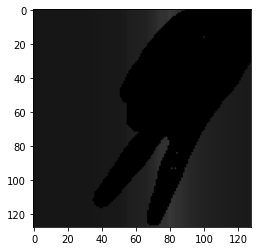

In [103]:
n = 119
img = X_test[n]
plt.imshow(img)

In [104]:
input_img = np.expand_dims(img, axis = 0)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

The prediction for this image is:  [[5.8394658e-09 8.8047564e-06 9.9998784e-01 6.1971264e-07 2.4961809e-11
  9.7999864e-10 1.7826086e-09 2.6286559e-06 1.7730343e-07 1.3555091e-12]]
The actual label for this image is:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
_, acc = model.evaluate(X_test, y_test)
print('Accuracy = ', (acc * 100.0), '100%')

52/52 [==============================] - 3s 40ms/step - loss: 0.1321 - accuracy: 0.9648
Accuracy =  96.47844433784485 100%
